In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('titanic1.csv')
df

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0
...,...,...,...,...
886,NaN,211536,3,0
887,B42,112053,3,1
888,NaN,W./C. 6607,1,0
889,C148,111369,2,1


In [3]:
# Handling 'number' column

In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [5]:
df['number'].value_counts()

A    139
6    131
1    129
4    126
2    126
5    123
3    117
Name: number, dtype: int64

Text(0.5, 1.0, 'Passengers travelling with')

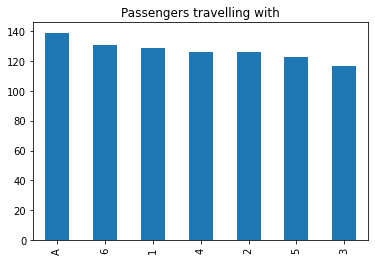

In [6]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [7]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [8]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)  # It means where numeric is not present, replace it with NaN

In [9]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [10]:
df['number_numerical'] = df['number_numerical'].replace(np.NaN,0) # Replace NaN values in number_numerical column with 0
df['number_categorical'] = df['number_categorical'].replace(np.NaN,'Not Present') # Replace NaN values in number_categorical column with Not Present

In [11]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,Not Present
1,C85,PC 17599,3,1,3.0,Not Present
2,NaN,STON/O2. 3101282,6,1,6.0,Not Present
3,C123,113803,3,1,3.0,Not Present
4,NaN,373450,A,0,0.0,A


In [12]:
# Handling 'Cabin' column

In [13]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # regular expression inside str.extract captures numerical part

In [15]:
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,Not Present,NaN,NaN
1,C85,PC 17599,3,1,3.0,Not Present,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,Not Present,NaN,NaN
3,C123,113803,3,1,3.0,Not Present,123,C
4,NaN,373450,A,0,0.0,A,NaN,NaN


In [16]:
df['cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin_cat, dtype: int64

<AxesSubplot:>

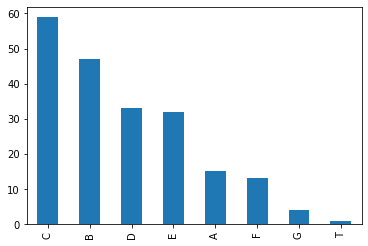

In [17]:
df['cabin_cat'].value_counts().plot(kind='bar')  # OR  df['cabin_cat'].value_counts().plot.bar()

<AxesSubplot:>

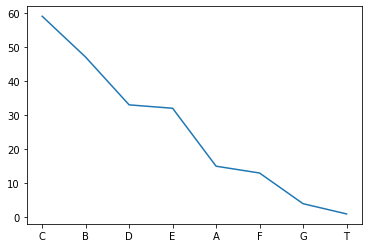

In [18]:
df['cabin_cat'].value_counts().plot.line()

In [19]:
# Handling 'Ticket' column

In [20]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [21]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'], errors='coerce', downcast='integer')

In [22]:
# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])

df.head(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,Not Present,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,Not Present,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,Not Present,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,Not Present,123,C,113803.0,NaN
4,NaN,373450,A,0,0.0,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,Not Present,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,Not Present,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,Not Present,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,Not Present,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,0.0,A,NaN,NaN,237736.0,NaN


In [23]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)